<a href="https://colab.research.google.com/github/JoMihye/Python/blob/main/ml05_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Machine Learning(기계 학습):
    *   지도학습(supervised learning): 레이블이 있는 데이터를 학습.
        *   분류(classification): 클래스를 분류.
        *   회귀(regression): 숫자 예측.
    *   비지도학습(unsupervised learning): 레이블이 없는 데이터를 학습.
    *   준지도학습(semi-supervised learning): 비지도학습 + 전문가 시스템.
    *   강화학습(reinforcement learning): 보상과 벌칙을 통해서 학습.

# Objectives

fish 데이터 셋에서 물고기의 무게(Weight) 예측.
*   Perch(농어)의 무게를 길이 특성만으로 예측.
    *   Weight(관심 변수, 종속 변수, 레이블) ~ Length(독립 변수, 특성)
    *   KNN, Linear Regression
*   Perch(농어)의 무게를 모든 특성들을 사용해서 예측.
    *   Weight ~ Length + Diagonal + Height + Width
    *   Linear Regression

# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  # 훈련/테스트 셋 분리
from sklearn.preprocessing import StandardScaler  # 특성 스케일링(표준화)
from sklearn.preprocessing import PolynomialFeatures  # 다차항을 추가해주는 변환기
from sklearn.pipeline import Pipeline  # Transformer(변환기)와 Estimator(예측기)를 연결해 주는 클래스
from sklearn.neighbors import KNeighborsRegressor  # KNN 알고리즘을 사용한 숫자 예측.
from sklearn.linear_model import LinearRegression  # 선형 회귀를 사용한 숫자 예측.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # 회귀 평가 지표들

# 데이터 준비

In [ ]:
# fish 데이터 셋
fish_csv = 'https://github.com/rickiepark/hg-mldl/raw/master/fish.csv'

In [ ]:
fish = pd.read_csv(fish_csv)

In [ ]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
# perch(농어) 데이터 셋
perch = fish[fish.Species == 'Perch']

In [ ]:
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


In [ ]:
perch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 72 to 127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   56 non-null     object 
 1   Weight    56 non-null     float64
 2   Length    56 non-null     float64
 3   Diagonal  56 non-null     float64
 4   Height    56 non-null     float64
 5   Width     56 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.1+ KB


농어의 무게(Weight)를 길이(Length)만으로 예측할 수 있을까?
*   특성(feature), 독립 변수: Length
*   타겟(target), 레이블(label), 종속(관심) 변수: Weight

In [ ]:
# X: 특성 (2차원) 배열 - 독립 변수, y: 타겟 (1차원) 배열 - 종속 변수
X = perch[['Length']].values.copy()  #> (56, 1) shape의 2차원 배열
y = perch['Weight'].values.copy()  #> (56,) shape의 1차원 배열

In [ ]:
X.shape, y.shape

((56, 1), (56,))

# train/test split

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y,
                                          test_size=0.25,
                                          random_state=42)

In [ ]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((42, 1), (14, 1), (42,), (14,))

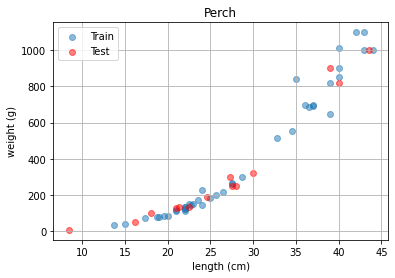

In [ ]:
# Weight ~ Length 시각화. 훈련 셋/테스트 셋의 색깔을 다르게.
plt.scatter(X_tr, y_tr, alpha=0.5, label='Train')
plt.scatter(X_te, y_te, alpha=0.5, color='red', label='Test')

plt.legend()
plt.xlabel('length (cm)')
plt.ylabel('weight (g)')
plt.title('Perch')
plt.grid()
plt.show()

# KNN Regressor 모델 훈련, 평가

KNN(k-Nearest Neighbors) Regressor: 가장 가까운 k개의 이웃들의 레이블(타겟)의 평균값으로 숫자를 예측하는 모델.

In [ ]:
knn_reg = KNeighborsRegressor()  # k=5인 KNN 회귀 모델을 생성

In [ ]:
knn_reg.fit(X_tr, y_tr)  # 모델 훈련

KNeighborsRegressor()

In [ ]:
tr_pred = knn_reg.predict(X_tr)  # 훈련 셋 예측값 - 훈련 셋 농어 무게 예측값
tr_pred

array([  88.6,  123. ,   79.6,   70.6,  723. ,  193. ,  847. ,  847. ,
       1010. ,  123. ,   95. ,  123. ,  174. ,  248. , 1010. ,  847. ,
        174. ,  113. ,  248. ,  847. ,  659. ,  224. ,  723. ,   60. ,
        140. ,   60. ,  719. ,  694.2,  248. ,  167. ,  847. ,  113. ,
        168. ,  123. , 1010. ,  136. ,   79.6,  719. ,  123. ,  193. ,
        990. ,  659. ])

In [ ]:
y_tr  # 훈련 셋 실젯값 - 훈련 셋 농어 무게 실젯값

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [ ]:
# 0번 훈련 셋 샘플의 가장 가까운 이웃 5개
neighbor_index = knn_reg.kneighbors(X_tr[0].reshape((1, -1)), return_distance=False)
neighbor_index  # 가장 가까운 이웃 5개의 인덱스.

array([[ 0, 10, 36,  2, 17]])

In [ ]:
y_tr[neighbor_index[0]]  # 0번 훈련 셋 샘플과 가장 가까운 이웃 5개의 레이블(무게)

array([ 85.,  85.,  80.,  78., 115.])

In [ ]:
y_tr[neighbor_index[0]].mean()  # 가장 가까운 이웃 5개 레이블(무게)의 평균

88.6

In [ ]:
# 테스트 셋의 (농어 무게) 예측값
te_pred = knn_reg.predict(X_te)
te_pred

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

In [ ]:
# 테스트 셋 (농어 무게) 실젯값
y_te

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

## 회귀 모델 평가 지표

*   MSE(Mean Squared Errors): 오차들의 제곱의 평균
*   RMSE(Root Mean Squared Errors): MSE의 제곱근
*   MAE(Mean Absolute Errors): 오차들의 절대값의 평균
*   MSE, RMSE, MAE는 값이 작을 수록 좋은 점수. 더 성능이 좋은(오차가 작은) 회귀 모델.
    *   평가지표는 일반적으로 값이 클 수록 좋은 점수, 값이 작을 수록 나쁜 점수.
    *   회귀에서도 오차가 작을 수록 값이 커지고, 오차가 커질 수록 값이 작아지는 평가지표를 개발 -> R2 score.

In [ ]:
# 훈련 셋의 MSE
mean_squared_error(y_tr, tr_pred)

3716.5161904761903

In [ ]:
# 훈련 셋의 RMSE
np.sqrt(mean_squared_error(y_tr, tr_pred))

60.96323638453089

In [ ]:
# 훈련 셋의 R2 score: 오차가 전혀 없는 경우 1. 오차가 있으면 1보다 작아짐.
r2_score(y_tr, tr_pred)

0.9698823289099254

In [ ]:
knn_reg.score(X_tr, y_tr)  # 회귀 모델의 score() 메서드는 r2-score를 계산함.

0.9698823289099254

In [ ]:
# 테스트 셋 MSE
mean_squared_error(y_te, te_pred)
#> test MSE < train MSE
#> 테스트 셋의 오차들이 훈련 셋에서의 오차들보다 (평균적으로) 작다.
#> 테스트 셋에서 성능이 더 좋고, 훈련 셋에서의 성능이 나쁘다. -> underfitting(과소적합)

721.7385714285714

In [ ]:
# 테스트 셋 RMSE
np.sqrt(mean_squared_error(y_te, te_pred))

26.865192562655704

In [ ]:
# 테스트 셋 R2 score
r2_score(y_te, te_pred)
#> test R2 > train R2
#> 테스트 셋의 성능이 훈련 셋보다 더 좋다. -> 과소적합.

0.992809406101064

In [ ]:
knn_reg.score(X_te, y_te)

0.992809406101064

* $ y_i $ : $i$번째 샘플의 실젯값(label)
* $ \hat{y_i} $ : $i$번째 샘플의 예측값
* $ \bar{y} $ : 타겟의 평균값
* $ n $ : 샘플 개수

* MAE(Mean Absolute Errors)
$$
MAE = \frac{1}{n} \sum_{i=1}^{n} \lvert y_i - \hat{y_i} \rvert
$$

* MSE(Mean Squared Errors)
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} ( y_i - \hat{y_i} )^2
$$

* RMSE(Root Mean Squared Errors)
$$
RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} ( y_i - \hat{y_i} )^2 }
$$

* $ R^2 $ score(Coefficient of determinant, 결정 계수)
$$
R^2 = 1 - \dfrac{\text{MSE}}{\text{Variance}} 
    = 1 - \dfrac{ \sum_{i=1}^{n} (y_i - \hat{y_i})^2 }
                { \sum_{i=1}^{n} (y_i - \bar{y})^2 }
$$
    * 결정 계수는 최댓값이 1이 되도록 만든 평가 지표.
    * 모델이 타겟을 오차없이 정확하게 예측하면, 실제값 - 예측값 = 0 이므로, 결정 계수는 최댓값 1이 됨.
    * 모델이 타겟을 매우 비슷하게 예측하면, 오차가 매우 작으면 분자가 0에 가까운 값이 되므로, 결정 계수는 1보다는 작지만 1에 가까운 값이 됨.
    * 모델이 타겟의 평균으로만 예측하는 정도라면, (분자) = (분모) 이므로, 결정 계수는 0이 됨.
    * 모델이 타겟의 평균 정도도 예측하지 못하면(오차가 매우 크면), (분자) > (분모)일 수 있고, 그런 경우 결정 계수는 음수가 될 수 있음.

# KNN Regressor 문제점

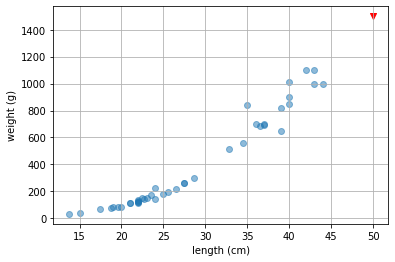

In [ ]:
# 훈련 셋 시각화
plt.scatter(X_tr, y_tr, alpha=0.5)

# 가상의 물고기(농어): 길이 50cm, 무게 1500g
plt.scatter(50, 1_500, color='red', marker='v')

plt.xlabel('length (cm)')
plt.ylabel('weight (g)')
plt.grid()
plt.show()

그림에서 알 수 있듯이, 훈련 데이터(농어 길이)의 최댓값 또는 최솟값에서 많이 벗어난 테스트 셋인 경우(outlier), 예측값을 가까운 이웃들의 평균값으로만 예측하기 때문에, 그 평균값이 실젯값과는 많이 다를 수 있음(오차가 클 수 있음).

In [ ]:
# 길이 50cm인 가상의 물고기의 무게 예측값
prediction = knn_reg.predict([[50]])
prediction

array([1010.])

In [ ]:
index = knn_reg.kneighbors([[50]], return_distance=False)
index  # 50cm 물고기에서 가장 가까운 훈련 셋 샘플 5개의 인덱스

array([[34, 14,  8, 40,  6]])

In [ ]:
y_tr[index[0]]  # 가장 가까운 이웃 5개의 무게

array([1000., 1100., 1000., 1100.,  850.])

In [ ]:
y_tr[index[0]].mean()  # 50cm 물고기의 무게 예측값

1010.0

머신 러닝 알고리즘:
*   사례 기반 학습(instance-based learning): KNN(k-Neareat Neighbors), ...
    *   수학적인 모델을 만들지 않고, 훈련 셋 데이터의 특징들을 사용해서 예측.
    *   outlier들이 많은 경우에는 성능이 떨어질 수 있음.
*   모델 기반 학습(model-based learning): Linear Regression, ...
    *   훈련 셋을 사용해서 수학적인 모델을 만들고, 그 수학적인 모델로 예측값을 계산.

# Linear Regression

In [ ]:
lin_reg = LinearRegression()  # 선형 회귀 머신 러닝 모델 생성

In [ ]:
lin_reg.fit(X_tr, y_tr)  # 모델 학습(훈련): y = ax + b 방정식의 계수(a, b)를 찾음.

LinearRegression()

In [ ]:
# 선형 회귀 모델 학습 결과 (1): 직선의 기울기. y=ax+b에서 a. coefficient(계수)
lin_reg.coef_  #> 독립 변수가 1개이므로 coef_는 원소가 1개인 배열.

array([39.01714496])

In [ ]:
# 선형 회귀 모델 학습 결과 (2): 직선의 y절편. y=ax+b에서 b.
lin_reg.intercept_

-709.0186449535477

In [ ]:
lin_reg.coef_[0] * 50 + lin_reg.intercept_  # 50cm 물고기의 무게 예측값. -> KNN보다는 오차가 적음.

1241.8386032279625

In [ ]:
# 훈련 셋의 예측값
tr_pred = lin_reg.predict(X_tr)
tr_pred[:4]

array([ 55.71739633, 149.35854425,  20.60196587, -30.12032259])

In [ ]:
y_tr[:4]

array([ 85., 135.,  78.,  70.])

In [ ]:
mean_squared_error(y_tr, tr_pred)  #> KNN보다 오차가 더 큼.

7422.953552609781

In [ ]:
r2_score(y_tr, tr_pred)  # KNN보다 작음.

0.939846333997604

In [ ]:
lin_reg.score(X_tr, y_tr)

0.939846333997604

In [ ]:
te_pred = lin_reg.predict(X_te)  # 테스트 셋 예측값
te_pred

array([-381.27462726,   -6.71003561,  363.95284155,  122.04654277,
        168.86711673,  851.66715359,  461.49570396,  250.80312115,
        812.65000863,  110.34139928,  988.22716096,  -76.94089654,
        383.46141403,  356.14941255])

In [ ]:
y_te  # 테스트 셋 실젯값

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

In [ ]:
r2_score(y_te, te_pred)  # KNN 결과보다 나쁨.

0.8247503123313558

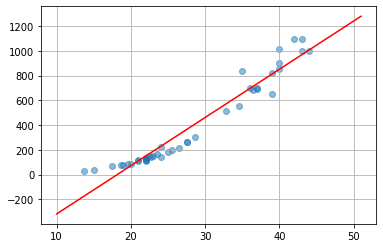

In [ ]:
# 훈련 셋 산점도
plt.scatter(X_tr, y_tr, alpha=0.5)
# y = ax + b: 선형 회귀식(직선의 방정식) - 선 그래프
a = lin_reg.coef_[0]  # 직선의 기울기
b = lin_reg.intercept_  # 직선의 y절편(x=0일 때 직선이 y축과 만나는 점)
x = np.arange(10, 51, 0.001)
y = a * x + b
plt.plot(x, y, 'r-')

plt.grid()
plt.show()

In [ ]:
Xb = np.c_[X_tr, np.ones(len(X_tr))]

In [ ]:
Xb.shape

(42, 2)

In [ ]:
Xb[:5]

array([[19.6,  1. ],
       [22. ,  1. ],
       [18.7,  1. ],
       [17.4,  1. ],
       [36. ,  1. ]])

In [ ]:
Xb[-5:]

array([[37. ,  1. ],
       [22. ,  1. ],
       [25.6,  1. ],
       [42. ,  1. ],
       [34.5,  1. ]])

선형 회귀의 목적은 선형 회귀 방정식에서 예측하는 값과 실젯값 사이의 오차들(MSE)이 가장 작은 방정식을 찾는 것.
$$
\mathbf{y} = \mathbf{X} \cdot \mathbf{w}
$$

정규 방정식(Noraml Equation)을 풀면 RMSE를 최소로 만드는 선형 회귀식의 coefficients와 intercept를 계산할 수 있음.
$$
\mathbf{w} = {({\mathbf{X}}^{T} \cdot \mathbf{X})}^{-1} \cdot {\mathbf{X}}^{T} \cdot \mathbf{y}
$$

그래서, Linear Regression 알고리즘은 훈련 셋 데이터와 레이블을 사용해서 정규 방정식을 풀고 선형 회귀식(직선의 방정식)의 계수들을 찾음.

In [ ]:
np.linalg.inv(Xb.T @ Xb) @ Xb.T @ y_tr

array([  39.01714496, -709.01864495])

# 2차항을 포함하는 선형 회귀

In [ ]:
X_tr.shape, y_tr.shape

((42, 1), (42,))

In [ ]:
X_tr[:5]  # 훈련 셋의 첫 5개 생선의 길이(length)

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ]])

In [ ]:
# 2차항을 추가한 훈련 셋
X_tr_poly = np.c_[X_tr ** 2, X_tr]
X_tr_poly.shape

(42, 2)

In [ ]:
X_tr_poly[:5]  # length**2과 length를 컬럼으로 갖는 2차원 배열 -> 2차 선형 회귀에서 학습시킬 데이터

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ]])

In [ ]:
lin_reg = LinearRegression()  # 선형 회귀 모델 생성

In [ ]:
lin_reg.fit(X_tr_poly, y_tr)  # 2차항을 가지고 있는 데이터로 회귀 모델을 학습시킴.

LinearRegression()

In [ ]:
lin_reg.coef_  # y = ax^2 + bx + c 에서 a와 b

array([  1.01433211, -21.55792498])

In [ ]:
lin_reg.intercept_  # y = ax^2 + bx + c 에서 c

116.0502107827827

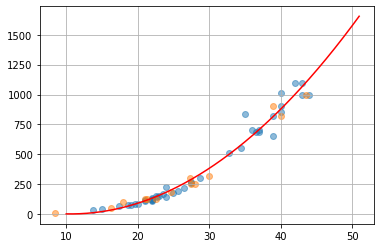

In [ ]:
# 훈련 셋 산점도
plt.scatter(X_tr, y_tr, alpha=0.5)
# 테스트 셋 산점도
plt.scatter(X_te, y_te, alpha=0.5)

# 2차항을 포함하는 선형 회귀식: y = ax^2 + bx + c
x = np.arange(10, 51, 0.001)
Xb = np.c_[x**2, x]
y = Xb @ lin_reg.coef_ + lin_reg.intercept_
plt.plot(x, y, 'r-')

plt.grid()
plt.show()

훈련 셋에서 RMSE, R2 score

테스트 셋에서 RMSE, R2 score

1차항만 있는 경우와 비교, KNN Regressor와 비교

In [ ]:
tr_pred = lin_reg.predict(X_tr_poly)  # 훈련 셋에서의 무게 예측값
tr_pred[:4]

array([ 83.18070434, 132.71260219,  67.61880901,  48.04150559])

In [ ]:
y_tr[:4]

array([ 85., 135.,  78.,  70.])

In [ ]:
np.sqrt(mean_squared_error(y_tr, tr_pred))  # 훈련 셋 RMSE - KNN보다 오차가 작음.

60.149744308383895

In [ ]:
r2_score(y_tr, tr_pred)  # 훈련 셋 결정 계수(R2 score) - KNN보다 큼. 

0.9706807451768623

In [ ]:
X_te_poly = np.c_[X_te ** 2, X_te]  # 2차항을 추가한 테스트 셋
X_te_poly[:5]

array([[ 70.56,   8.4 ],
       [324.  ,  18.  ],
       [756.25,  27.5 ],
       [453.69,  21.3 ],
       [506.25,  22.5 ]])

In [ ]:
te_pred = lin_reg.predict(X_te_poly)  # 테스트 셋 예측값
te_pred

array([   6.5349146 ,   56.6511646 ,  290.29593158,  117.05874344,
        144.50252913,  876.66458663,  382.21135986,  199.55847561,
        818.09027497,  110.65424646, 1097.65040817,   33.01314491,
        307.66468513,  283.49043666])

In [ ]:
y_te

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

In [ ]:
np.sqrt(mean_squared_error(y_te, te_pred))  # 테스트 셋 RMSE - KNN보다 오차 큼.

47.42359612512815

In [ ]:
r2_score(y_te, te_pred)  # 테스트 셋 결정계수 - KNN보다 작음.

0.9775935108325122

# Pipeline: PolynomialFeatures + LinearRegression

In [ ]:
X_tr.shape, X_te.shape

((42, 1), (14, 1))

In [ ]:
# Pipeline으로 연결할 변환기(transformer) 객체와 예측기(estimator) 객체를 생성.
poly = PolynomialFeatures(degree=2, include_bias=False)  # 변환기(fit, transform)
lin_reg = LinearRegression()  # 예측기(fit, predict, score)

In [ ]:
# 변환기 -> 예측기 순서로 Pipeline 객체를 생성.
model = Pipeline([('poly', poly), ('reg', lin_reg)])

In [ ]:
# 모델 훈련(fit): (1) poly.fit_transform() --> (2) reg.fit()
model.fit(X_tr, y_tr)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('reg', LinearRegression())])

In [ ]:
# 훈련 셋 예측(predict):  (1) poly.transform() --> (2) reg.predict()
tr_pred = model.predict(X_tr)
tr_pred[:4]

array([ 83.18070434, 132.71260219,  67.61880901,  48.04150559])

In [ ]:
# 테스트 셋 예측
te_pred = model.predict(X_te)
te_pred[:4]

array([  6.5349146 ,  56.6511646 , 290.29593158, 117.05874344])

# 농어의 모든 특성을 사용한 KNN Regressor

In [ ]:
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


*   perch -> X(2차원 배열), y(1차원 배열)
*   train_test_split
*   KNN 생성, 훈련, 예측, 평가
*   LinearRegression 생성, 훈련, 예측, 평가
*   모든 특성들의 2차항까지를 고려한 LinearRegression 훈련, 평가